C:\Users\13844\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\13844\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


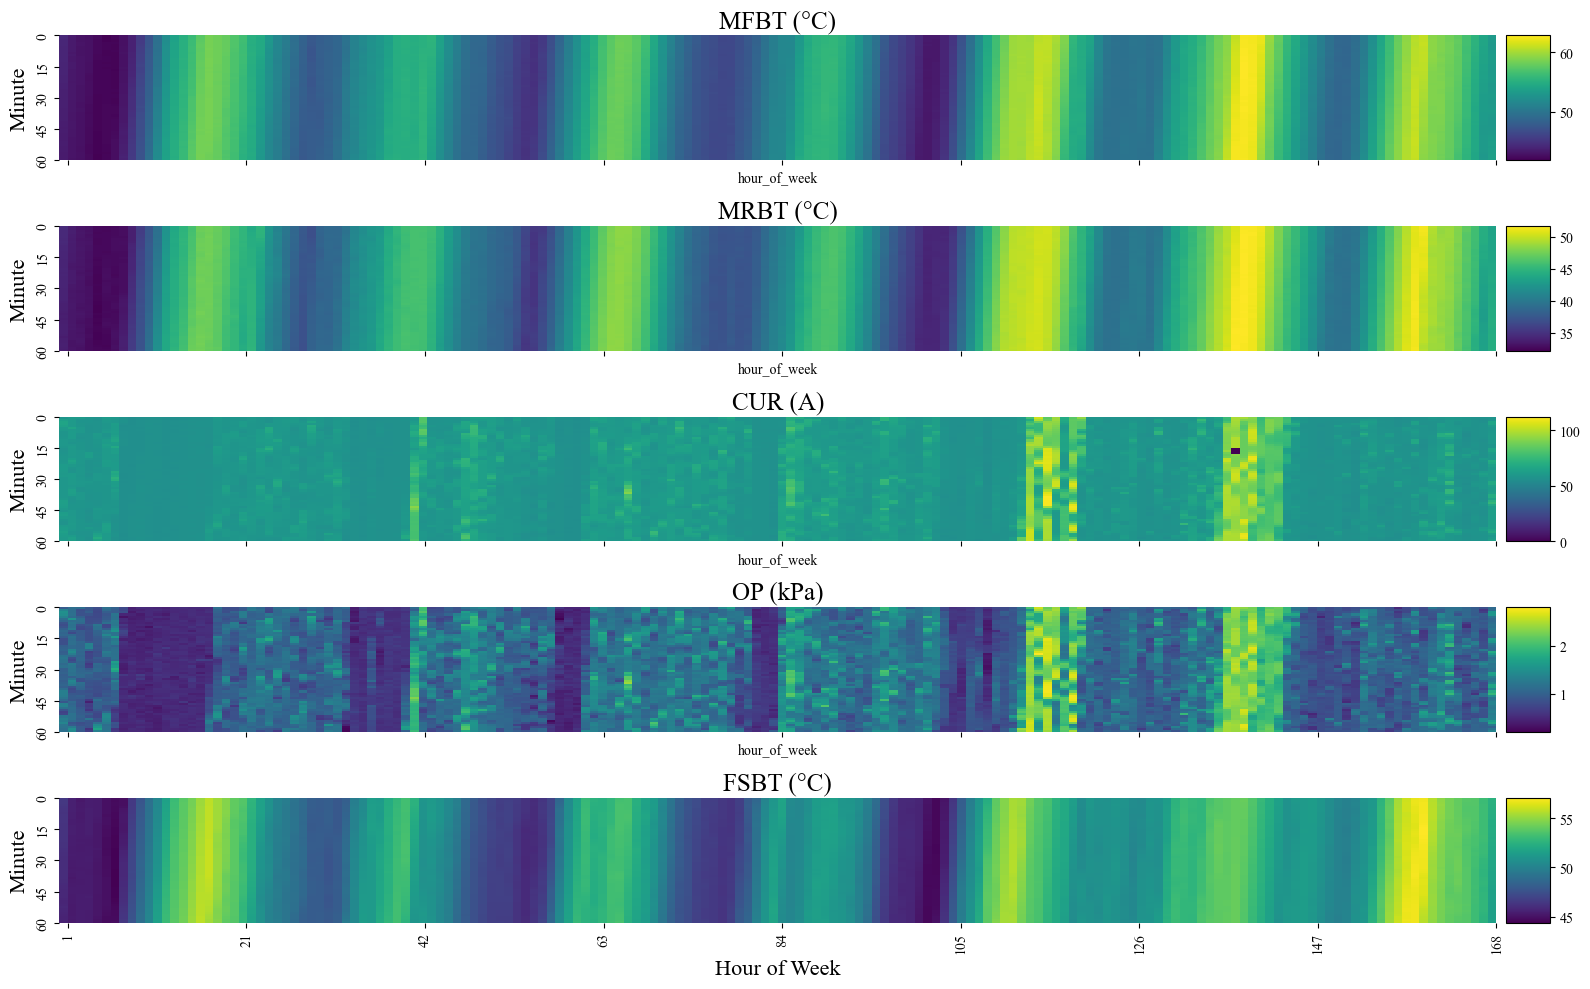

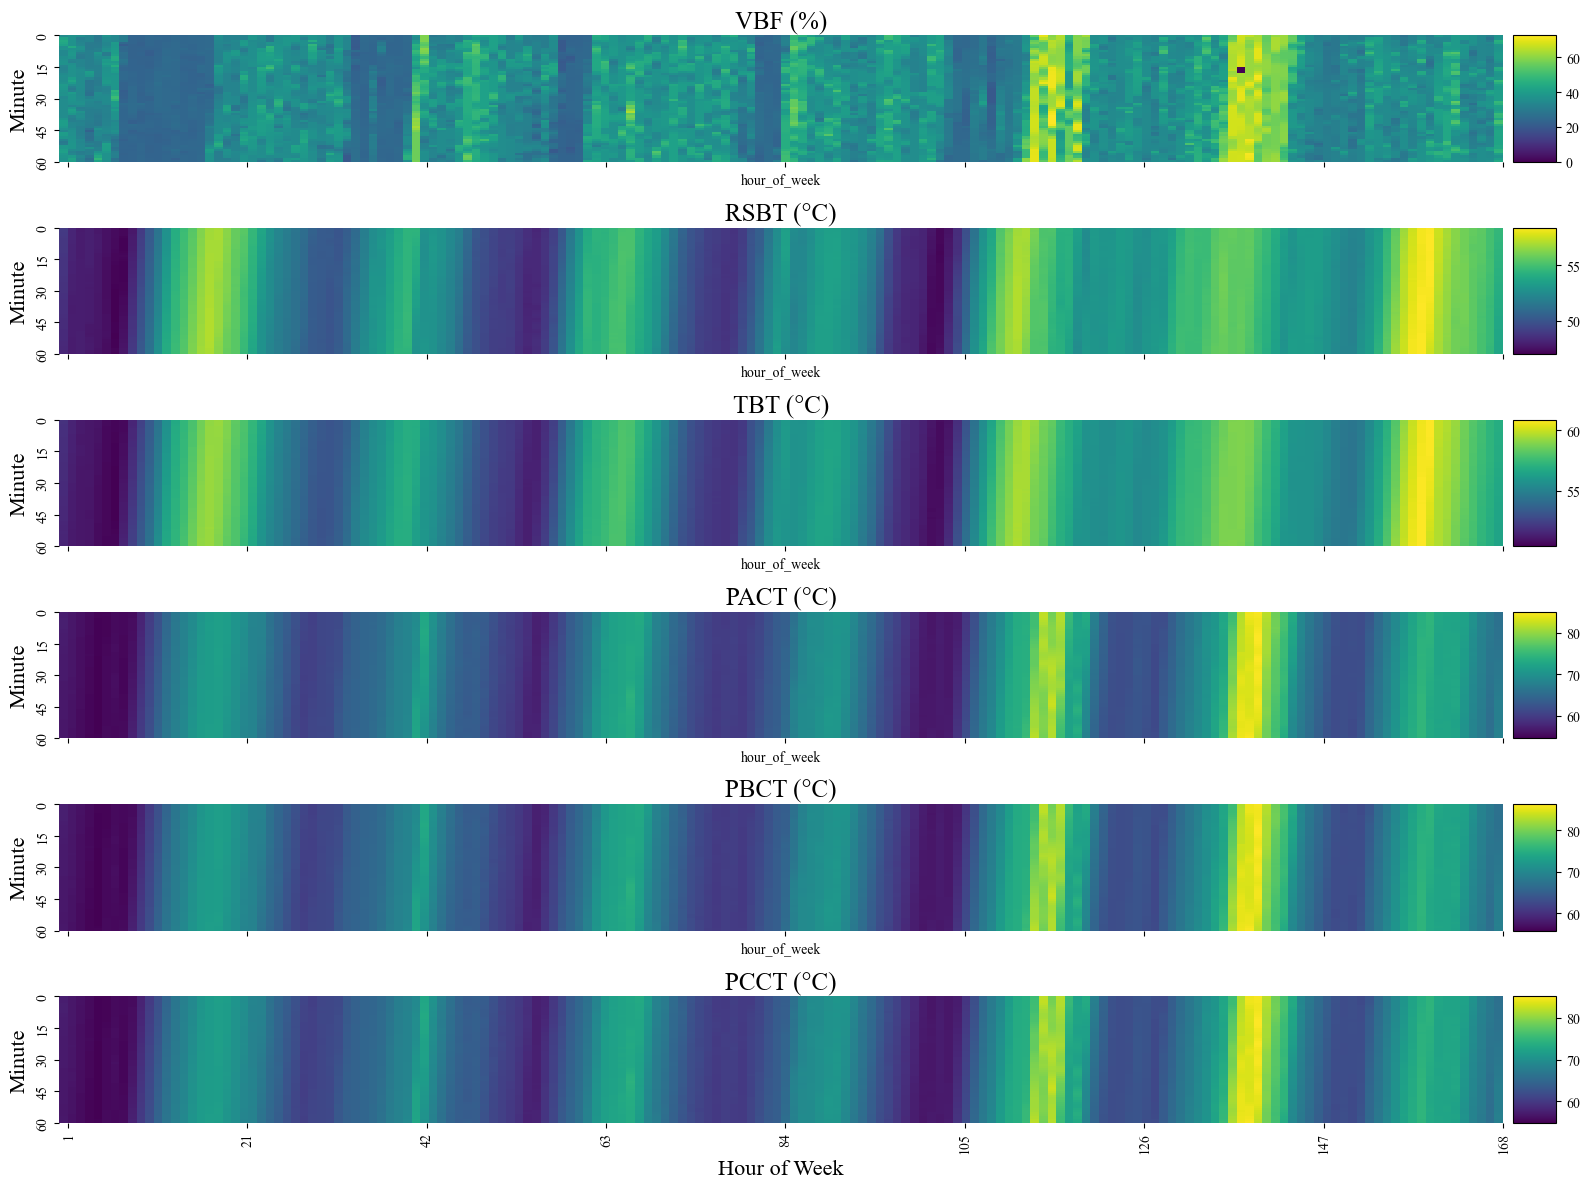

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'Times New Roman'

# Load the uploaded dataset
file_path = r'C:\Users\13844\Desktop\papers\paper4\data\MFV_modified.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('date', inplace=True)


# Select only numeric columns for processing
numeric_cols = df.select_dtypes(include=[np.number]).columns
processed_df = df[numeric_cols].copy()

# Define feature information: variable names and their units for visualization
feature_info = [
    ("MFBT", "\u00b0C"),  # Example: Main Fan Bearing Temperature (in Celsius)
    ("MRBT", "\u00b0C"),  # Motor Rear Bearing Temperature
    ("CUR", "A"),         # Current (in Amperes)
    ("OP", "kPa"),        # Outlet Pressure (in kPa)
    ("FSBT", "\u00b0C"),  # Front Support Bearing Temperature
    ("VBF", "%"),        # Vane Blade Feedback (in percentage)
    ("RSBT", "\u00b0C"),  # Rear Support Bearing Temperature
    ("TBT", "\u00b0C"),   # Thrust Bearing Temperature
    ("PACT", "\u00b0C"),  # Phase A Coil Temperature
    ("PBCT", "\u00b0C"),  # Phase B Coil Temperature
    ("PCCT", "\u00b0C")   # Phase C Coil Temperature
]

# Split the features into two groups for better visualization
feature_groups = [
    feature_info[:len(feature_info)//2],  # First half of the features
    feature_info[len(feature_info)//2:]   # Second half of the features
]

# Iterate through each feature group for visualization
for group_idx, group in enumerate(feature_groups):
    # Create subplots for the group
    fig, axs = plt.subplots(nrows=len(group), figsize=(16, len(group) * 2), sharex=True)

    for i, (var, unit) in enumerate(group):
        # Calculate hour of the week (0-167) and minute of the hour (0-59)
        processed_df['hour_of_week'] = ((processed_df.index - processed_df.index[0]).total_seconds() // 3600).astype(int) % 168
        processed_df['minute'] = processed_df.index.minute

        # Create a pivot table for the heatmap (rows: minutes, columns: hours of the week)
        pivot_table = processed_df.pivot_table(index='minute', columns='hour_of_week', values=var)

        # Define the color scale limits based on the variable's range
        vmin, vmax = processed_df[var].min(), processed_df[var].max()

        # Create the heatmap for the variable
        ax = axs[i]
        sns_heatmap = sns.heatmap(pivot_table, cmap='viridis', ax=ax, cbar=False, vmin=vmin, vmax=vmax)

        # Add a colorbar to the heatmap
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.1)
        cbar = plt.colorbar(sns_heatmap.get_children()[0], cax=cax)

        # Format the colorbar
        cbar.formatter = ScalarFormatter(useOffset=False)
        cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
        cbar.update_ticks()

        # Set labels and title for the subplot
        ax.set_ylabel('Minute', fontsize=16)
        if i == len(group) - 1:
            ax.set_xlabel('Hour of Week', fontsize=16)  # Only show x-label on the last subplot
        ax.set_title(f'{var} ({unit})', fontsize=16)

        # Customize y-axis ticks for minutes (0, 15, 30, 45, 60)
        ax.set_yticks([0, 15, 30, 45, 60])
        ax.set_yticklabels([0, 15, 30, 45, 60])

    # Set shared x-axis ticks and labels at the bottom plot only
    axs[-1].set_xticks(np.linspace(1, 168, 9))
    axs[-1].set_xticklabels([f'{int(tick)}' for tick in np.linspace(1, 168, 9)])

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

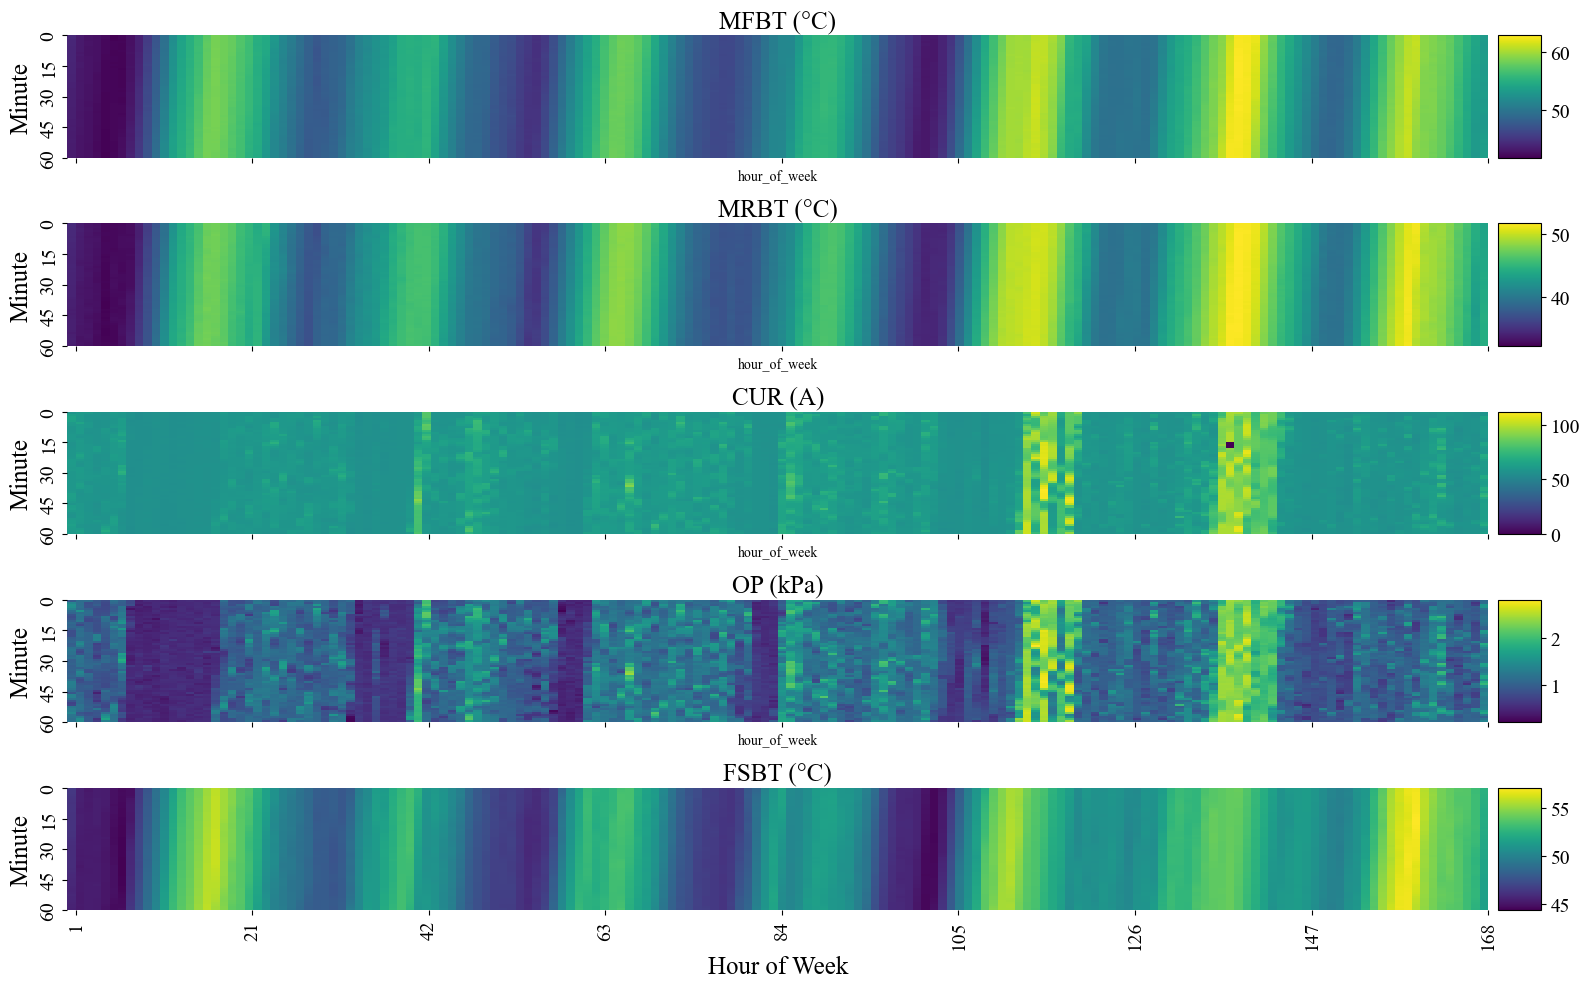

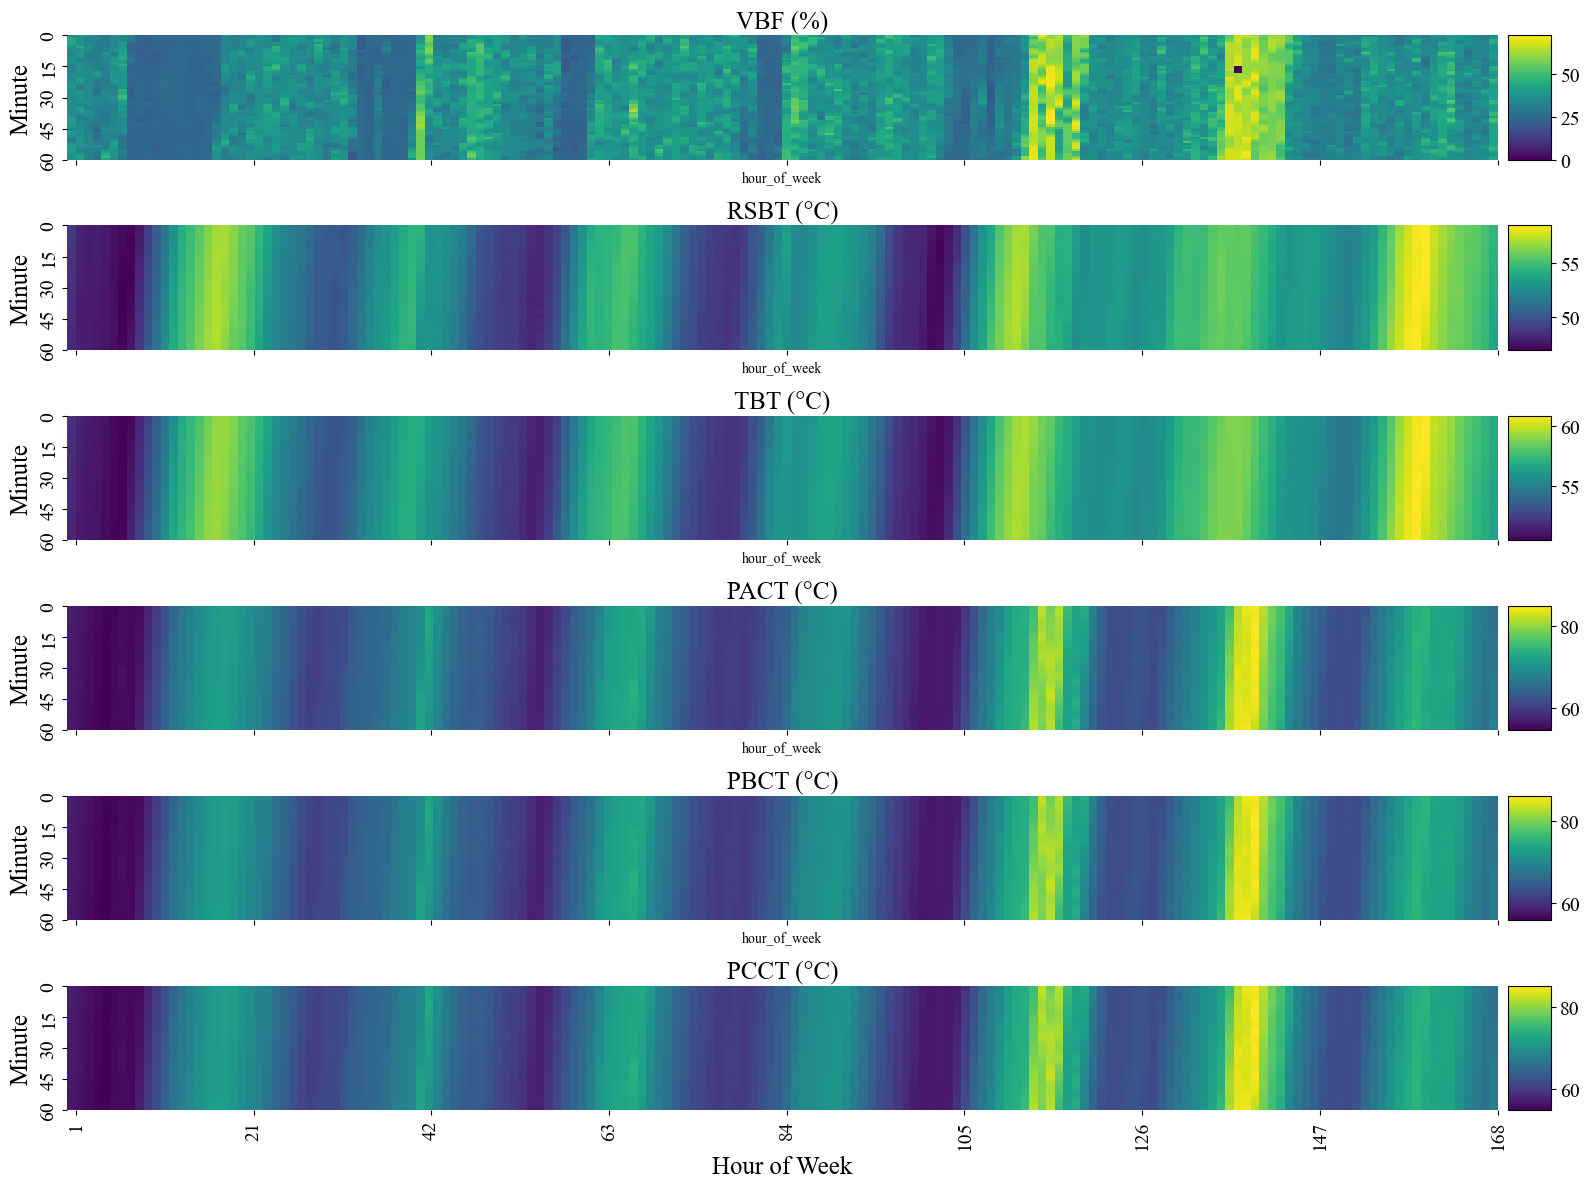

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'Times New Roman'

# Load the uploaded dataset
file_path = r'C:\Users\13844\Desktop\papers\paper4\data\MFV_modified.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('date', inplace=True)

# Select only numeric columns for processing
numeric_cols = df.select_dtypes(include=[np.number]).columns
processed_df = df[numeric_cols].copy()

# Define feature information: variable names and their units for visualization
feature_info = [
    ("MFBT", "\u00b0C"),  # Example: Main Fan Bearing Temperature (in Celsius)
    ("MRBT", "\u00b0C"),  # Motor Rear Bearing Temperature
    ("CUR", "A"),         # Current (in Amperes)
    ("OP", "kPa"),        # Outlet Pressure (in kPa)
    ("FSBT", "\u00b0C"),  # Front Support Bearing Temperature
    ("VBF", "%"),         # Vane Blade Feedback (in percentage)
    ("RSBT", "\u00b0C"),  # Rear Support Bearing Temperature
    ("TBT", "\u00b0C"),   # Thrust Bearing Temperature
    ("PACT", "\u00b0C"),  # Phase A Coil Temperature
    ("PBCT", "\u00b0C"),  # Phase B Coil Temperature
    ("PCCT", "\u00b0C")   # Phase C Coil Temperature
]

# Split the features into two groups for better visualization
feature_groups = [
    feature_info[:len(feature_info)//2],  # First half of the features
    feature_info[len(feature_info)//2:]   # Second half of the features
]

# Iterate through each feature group for visualization
for group_idx, group in enumerate(feature_groups):
    # Create subplots for the group
    fig, axs = plt.subplots(nrows=len(group), figsize=(16, len(group) * 2), sharex=True)

    for i, (var, unit) in enumerate(group):
        # Calculate hour of the week (0-167) and minute of the hour (0-59)
        processed_df['hour_of_week'] = ((processed_df.index - processed_df.index[0]).total_seconds() // 3600).astype(int) % 168
        processed_df['minute'] = processed_df.index.minute

        # Create a pivot table for the heatmap (rows: minutes, columns: hours of the week)
        pivot_table = processed_df.pivot_table(index='minute', columns='hour_of_week', values=var)

        # Define the color scale limits based on the variable's range
        vmin, vmax = processed_df[var].min(), processed_df[var].max()

        # Create the heatmap for the variable
        ax = axs[i]
        sns_heatmap = sns.heatmap(pivot_table, cmap='viridis', ax=ax, cbar=False, vmin=vmin, vmax=vmax)

        # Add a colorbar to the heatmap
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.1)
        cbar = plt.colorbar(sns_heatmap.get_children()[0], cax=cax)

        # Format the colorbar
        cbar.formatter = ScalarFormatter(useOffset=False)
        cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
        cbar.update_ticks()

        # Increase colorbar label font size
        cbar.ax.tick_params(labelsize=14)  # Set font size for colorbar labels

        # Set labels and title for the subplot
        ax.set_ylabel('Minute', fontsize=18)
        if i == len(group) - 1:
            ax.set_xlabel('Hour of Week', fontsize=18)  # Only show x-label on the last subplot
        ax.set_title(f'{var} ({unit})', fontsize=18)

        # Customize y-axis ticks for minutes (0, 15, 30, 45, 60)
        ax.set_yticks([0, 15, 30, 45, 60])
        ax.set_yticklabels([0, 15, 30, 45, 60], fontsize=14)

    # Set shared x-axis ticks and labels at the bottom plot only
    axs[-1].set_xticks(np.linspace(1, 168, 9))
    axs[-1].set_xticklabels([f'{int(tick)}' for tick in np.linspace(1, 168, 9)], fontsize=14)

    # Adjust layout and save high-quality image
    output_path = f'C:\\Users\\13844\\Desktop\\papers\\paper4\\png\\历史快照图_group_{group_idx + 1}.png'
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, format='png', bbox_inches='tight')  # Save as PNG with high DPI
    plt.show()
